# CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pickle import dump,load
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

## *`EDA & Visualization`*

In [2]:
cs = pd.read_csv("marketing_campaign.csv")

In [3]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [4]:
cs.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
cs.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [6]:
#Dropping Null Values from the dataset
cs = cs.dropna()
cs["Income"] = cs["Income"].astype("int64")

#Droping Unnecessary Columns
cs = cs.drop(["ID", "Z_CostContact", "Z_Revenue"], axis = 1)

print("Shape -", cs.shape)
cs.head()

Shape - (2216, 26)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0


In [7]:
#Calculate Age using Year_Birth Column 
CY = pd.to_datetime("today").year
cs["Age"] = CY - cs["Year_Birth"]

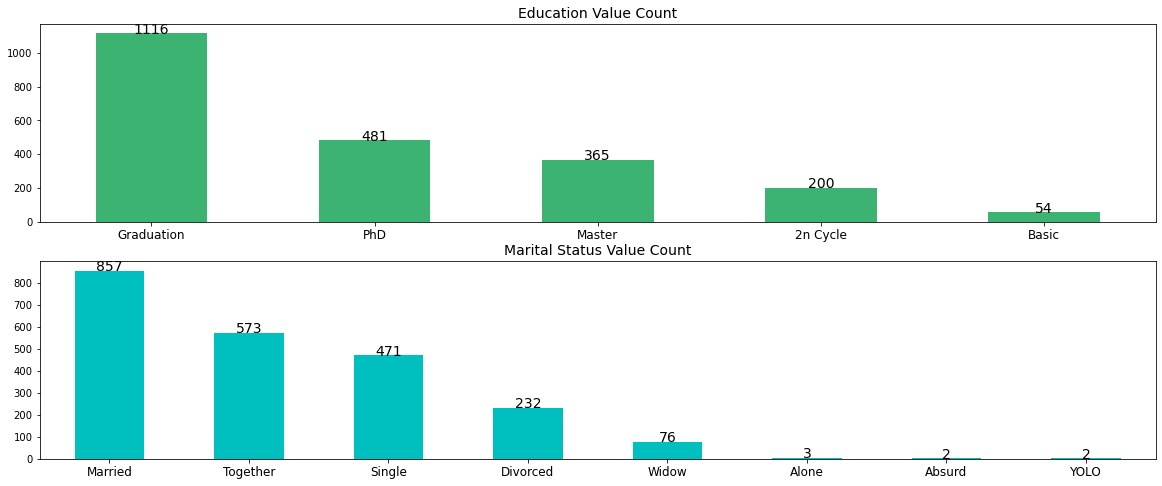

In [8]:
#Value Counts of columns - Education & Marital Status
fig = plt.figure(figsize = (20,8))

plt.subplot(2,1,1)
education_counts = cs["Education"].value_counts()
education_counts.plot(kind = "bar", rot = 0, color = "mediumseagreen")
plt.title("Education Value Count", fontsize = 14)
plt.xticks(fontsize = 12)
for i, count in enumerate(education_counts):
    plt.text(i, count, str(count), ha = "center", va = "baseline", fontsize = 14)

plt.subplot(2,1,2)
Marital_Status_counts = cs["Marital_Status"].value_counts()
Marital_Status_counts.plot(kind = "bar", rot = 0, color = "c")
plt.title("Marital Status Value Count", fontsize = 14)
plt.xticks(fontsize = 12)
for i, count in enumerate(Marital_Status_counts):
    plt.text(i, count, str(count), ha = "center", va = "baseline", fontsize = 14)
plt.show();

In [9]:
#Grouping Marital Status into 3 Categories and droping others 
cs["Marital_Status"] = cs["Marital_Status"].replace({"Married" : "Married", "Together" : "Married", "Single" : "Single",
                                                     "Divorced" : "Single", "Widow" : "Widow", "Alone" : "Others", 
                                                     "Absurd" : "Others", "YOLO" : "Others"})
cs = cs[cs["Marital_Status"] != "Others"]

#Grouping Education into 3 Categories  
cs["Education"] = cs["Education"].replace({"Graduation" : "Intermediate", "PhD" : "Master", "Master" : "Master", 
                                                     "2n Cycle" : "Basic", "Basic" : "Basic"})

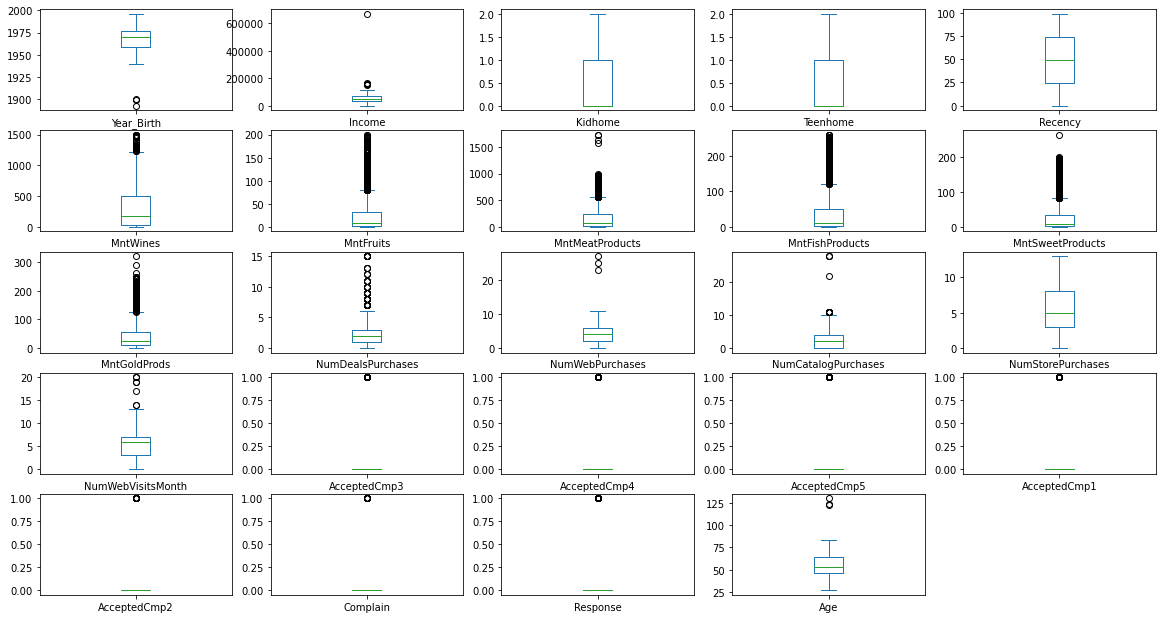

In [10]:
#Boxplot for each columns to detect outliers
cs.plot(kind = "box", figsize = (20, 13), subplots = True, layout = (6, 5), sharex = False, legend = False)
plt.show()

In [11]:
#Displaying Outlier Age 
pd.DataFrame(cs.Age.value_counts().sort_index(ascending=False)).head()

,Age
130,1
124,1
123,1
83,1
82,1


In [12]:
pd.DataFrame(cs.Income.value_counts().sort_index(ascending=False)).head()

,Income
666666,1
162397,1
160803,1
157733,1
157243,1


In [13]:
#Droping rows with Age above 100 & Income above 2 Lakhs as extreme Outliers 
cs = cs[cs["Age"] <= 100]
cs = cs[cs["Income"] < 666666]

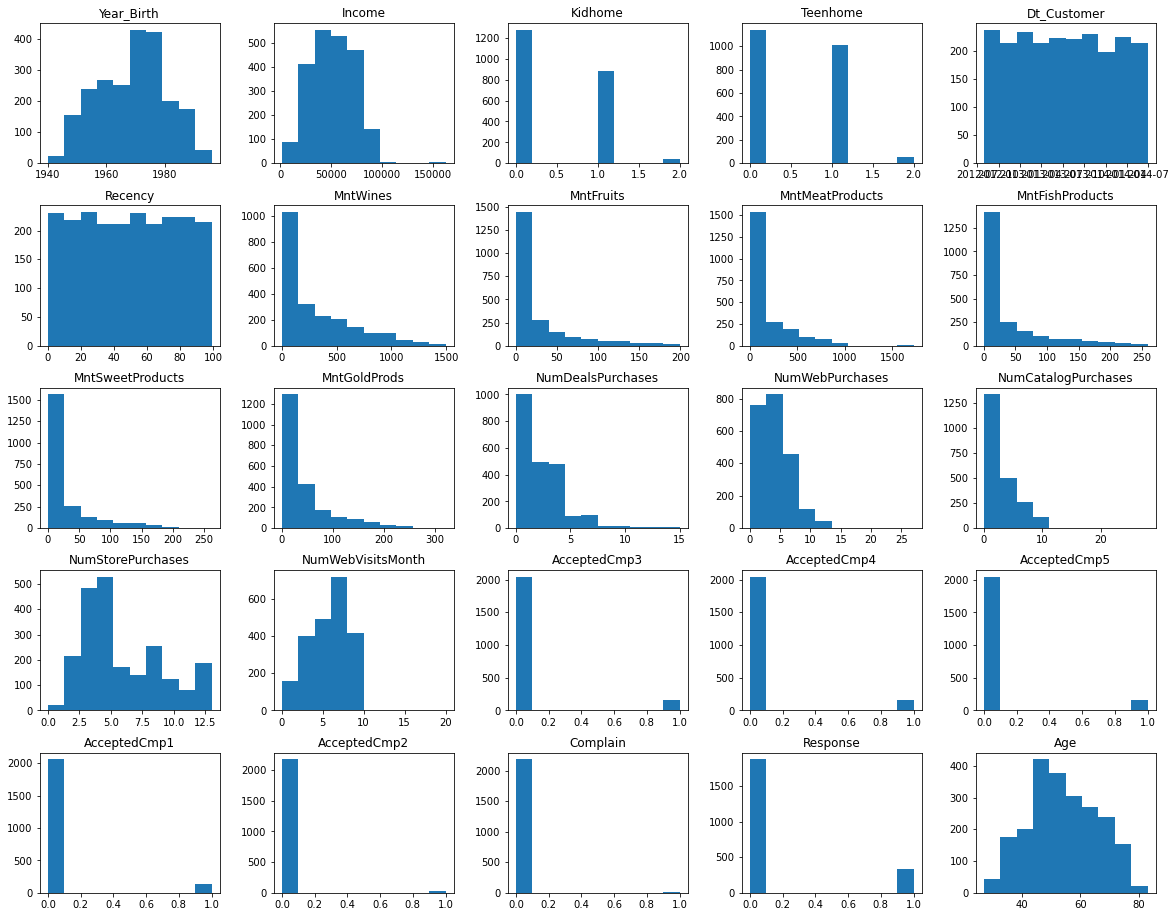

In [14]:
#Histogram for each columns
fig, ax = plt.subplots(figsize = (20, 16))
cs.hist(grid = False, ax = ax)
plt.show()

*Majority of people belongs from the Age group of 45-55*

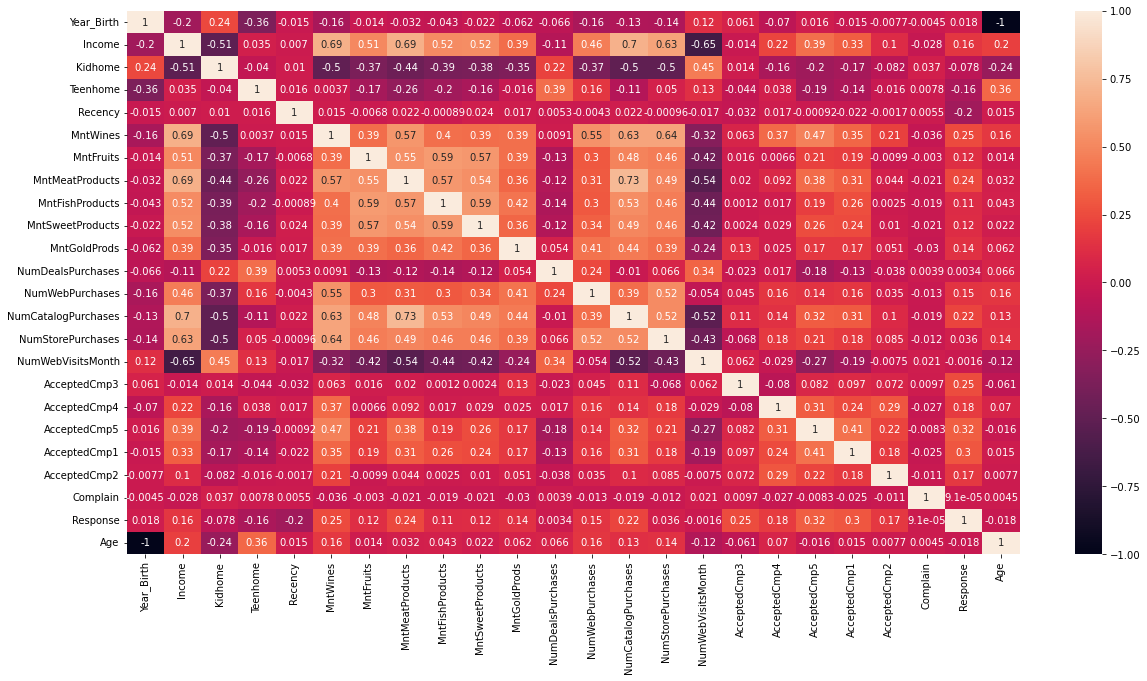

In [15]:
#Correlation Matrix
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(cs.corr(), vmin = -1, vmax = 1, annot = True, square = False);

*Upto some extent Age corelates with no. of teens at home                                              
It is seen that most of the amount spent on meat is purchases made using a catalogue*

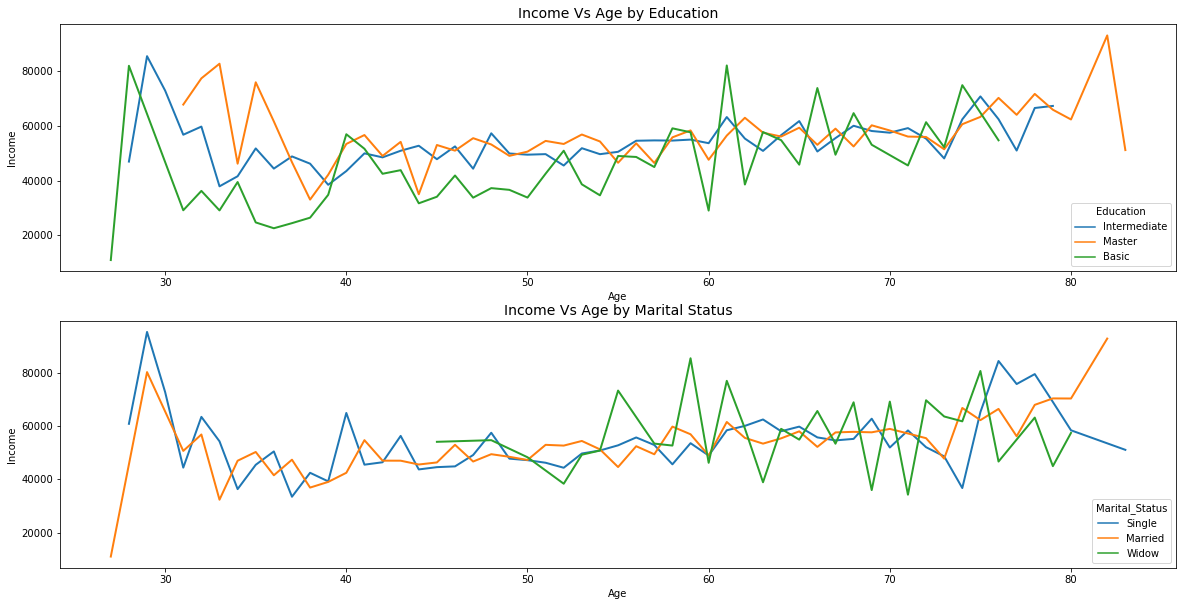

In [16]:
#Income Vs Age by Education & Marital Status
fig, ax = plt.subplots(figsize = (20,10))

plt.subplot(211)
sns.lineplot(x = "Age", y = "Income", hue = "Education", ci = None, linewidth = 2, data  = cs)
plt.title("Income Vs Age by Education", fontsize = 14)

plt.subplot(212)
sns.lineplot(x = "Age", y = "Income", hue = "Marital_Status", ci = None, linewidth = 2, data  = cs)
plt.title("Income Vs Age by Marital Status", fontsize = 14);

* *In both the cases it is seen that Income rises upto some extent as the age rises*                                
* *Both the graph shows no trend and are volatile*                                                      
* *A widow earns income after an age of 45 approx* 

,MntFruits,MntSweetProducts,MntFishProducts,MntGoldProds,MntMeatProducts,MntWines
Education,,,,,,
Basic,6466,7595,10515,10582,27621,40537
Intermediate,34318,34839,48214,56286,201152,317626
Master,17270,17305,24108,29723,139893,315224


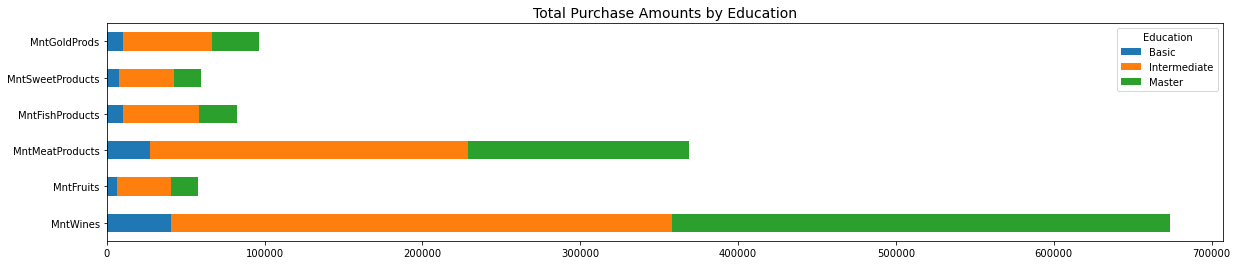

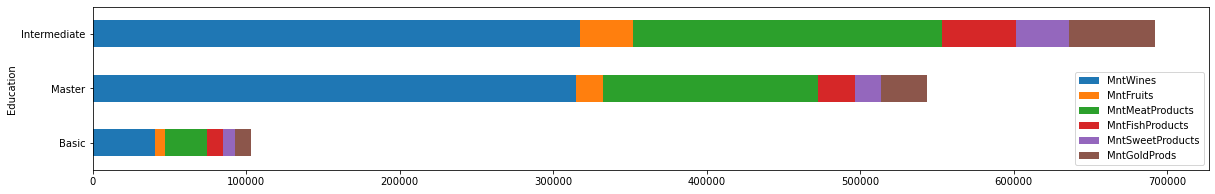

In [17]:
#Amt_Spend created for total expense
Amt_Spend = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

#Plot for Amount spend on Products by Education
cs.groupby("Education")[Amt_Spend].sum().transpose().plot(kind = "barh", stacked = True, figsize = (20, 4))
plt.title("Total Purchase Amounts by Education", fontsize = 14)
cs.groupby("Education")[Amt_Spend].sum().sort_values(by = Amt_Spend).plot(kind = "barh", stacked = True, figsize = (20, 3));

cs.groupby("Education")[Amt_Spend].sum().apply(lambda x: x.sort_values(), axis = 1)

* *It is seen that Highest amount is been spent on Wines by having Intermediate Education*                                      
* *Comparatively less amount is been spent on Fruits seeking Basic Education*                                        
* *Customer seeking Intermediate Educaion have spent the Highest amount on Products*

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Marital_Status,,,,,,
Married,52666,36435,61237,232682,37892,432927
Single,26378,19197,31109,121899,18969,212558
Widow,3793,2422,4245,14085,2878,27902


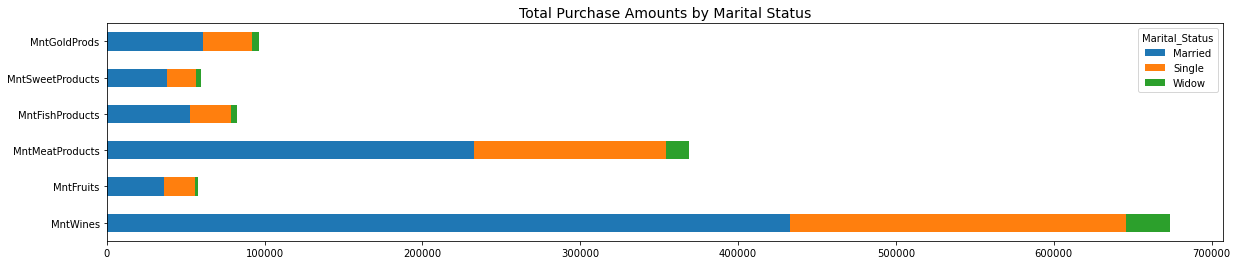

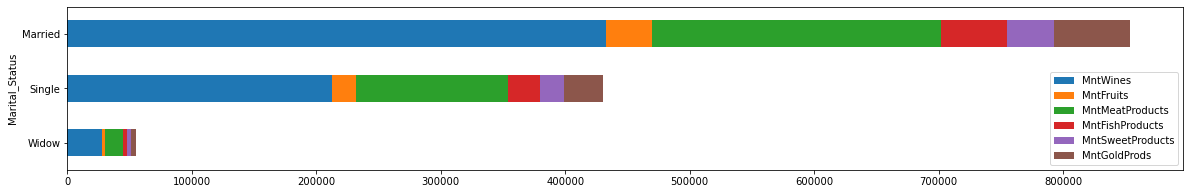

In [18]:
#Plot for Amount spend on Products by Marital Status
cs.groupby("Marital_Status")[Amt_Spend].sum().transpose().plot(kind = "barh", stacked = True, figsize = (20, 4))
plt.title("Total Purchase Amounts by Marital Status", fontsize = 14)
cs.groupby("Marital_Status")[Amt_Spend].sum().sort_values(by = Amt_Spend).plot(kind = "barh", stacked = True, figsize = (20, 3))


cs.groupby("Marital_Status")[Amt_Spend].sum().apply(lambda x: x.sort_values(), axis = 1)

* *Married Customers have spent the highest on wines*                                               
* *Overall also Married Customers have spent highest on products*                              
* *Fruits being the least bought by Widows*

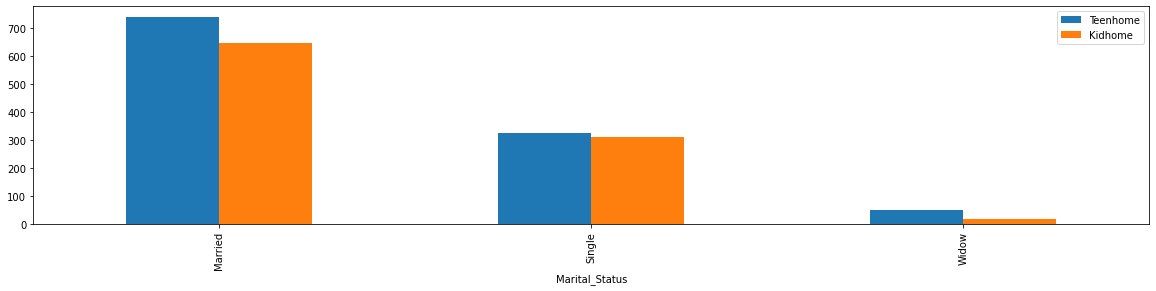

In [19]:
#Plot for Marital Status having Kids & Teens Home count
fig, ax = plt.subplots(figsize = (20, 4))
cs.groupby("Marital_Status")[["Teenhome", "Kidhome"]].sum().plot(kind = "bar", ax = ax);

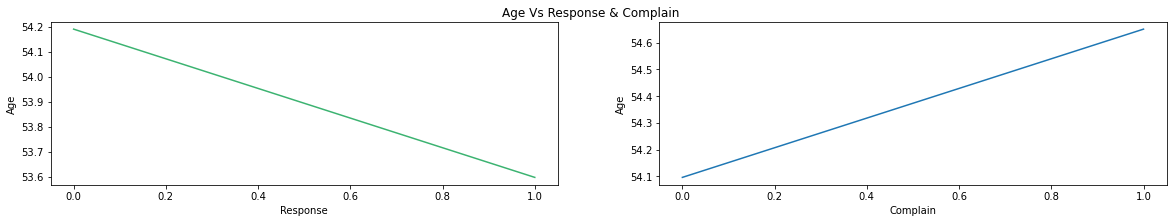

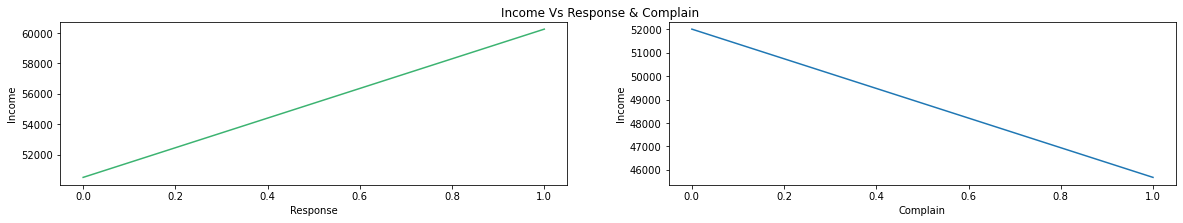

In [20]:
fig = plt.figure(figsize = (20,3))
plt.subplot(1,2,1) 
plt.suptitle("Age Vs Response & Complain", size = 12, y = .95) 
sns.lineplot(x = "Response", y = "Age", ci = None, color = "mediumseagreen", data = cs)
plt.subplot(1,2,2) 
sns.lineplot(x = "Complain", y = "Age", ci = None, data = cs)

fig = plt.figure(figsize = (20,3))
plt.subplot(1,2,1) 
plt.suptitle("Income Vs Response & Complain", size = 12, y = .95) 
sns.lineplot(x = "Response", y = "Income", ci = None, color = "mediumseagreen", data = cs)
plt.subplot(1,2,2) 
sns.lineplot(x = "Complain", y = "Income", ci = None, data = cs);

**0 == NO RESPONSE NO COMPLAIN**                                          
*In Age Plot the Response Decreases with Age whereas Complain Increases*                                                 
*Here with High Income Responses Increases and Complain Decreases*                                             

In [21]:
#Merging columns 
cs["Children"] = cs["Kidhome"] + cs["Teenhome"]
cs["Amount_Spent"] = cs["MntWines"] + cs["MntFruits"] + cs["MntMeatProducts"] + cs["MntFishProducts"] + cs["MntSweetProducts"] + cs["MntGoldProds"]
cs["Total_AcceptedCmp"] = cs["AcceptedCmp1"] + cs["AcceptedCmp2"] + cs["AcceptedCmp3"] + cs["AcceptedCmp4"] + cs["AcceptedCmp5"]

In [22]:
#Dropping columns after merging them and several Unnecessary columns also
cs = cs.drop(["Year_Birth", "Recency", "Kidhome", "Teenhome", "Dt_Customer", "MntWines", "MntFruits", "MntMeatProducts", 
              "MntFishProducts", "MntSweetProducts", "MntGoldProds", "NumDealsPurchases", "NumWebPurchases", 
              "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", 
              "AcceptedCmp4", "AcceptedCmp5" ,"Complain"], axis = 1)

In [23]:
#One Hot Encoding categorical Columns
cs = pd.get_dummies(cs)

In [24]:
#Arranging the columns and copying it in a order
cols = ["Age", "Marital_Status_Single", "Marital_Status_Married", "Marital_Status_Widow", "Education_Basic", 
        "Education_Intermediate", "Education_Master", "Children", "Income", "Amount_Spent", "Total_AcceptedCmp", "Response"]

cluster = cs[cols].copy()
cluster = cluster.reset_index(drop = True)

## *`Data Pre-Processing & Clustering Analysis`*

In [25]:
#Normalizing the data
scaler = StandardScaler().fit(cluster)
cluster_norm = scaler.fit_transform(cluster)

Silhouette Score for k = 2: 0.2164
Silhouette Score for k = 3: 0.2084
Silhouette Score for k = 4: 0.2243
Silhouette Score for k = 5: 0.2292
Silhouette Score for k = 6: 0.2725
Silhouette Score for k = 7: 0.3061
Silhouette Score for k = 8: 0.2840
Silhouette Score for k = 9: 0.2819
Silhouette Score for k = 10: 0.2835


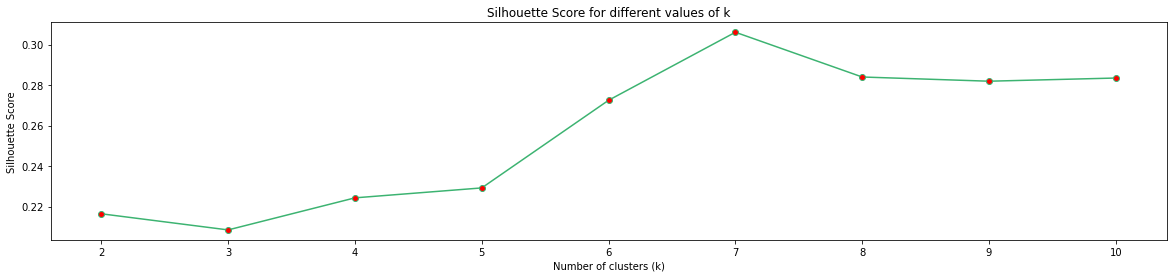

In [26]:
#Perform K-means clustering for different numbers of clusters & Silhouette Scores for optimal k
silhouette_scores = [silhouette_score(cluster_norm, KMeans(n_clusters = k, random_state = 50).fit_predict(cluster_norm)) 
                     for k in range(2, 11)]

for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k = {k}: {score:.4f}")

fig = plt.figure(figsize = (20 ,4)) 
plt.plot(range(2, 11), silhouette_scores, color = "mediumseagreen", marker = "o", markerfacecolor = "r")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different values of k")
plt.show();

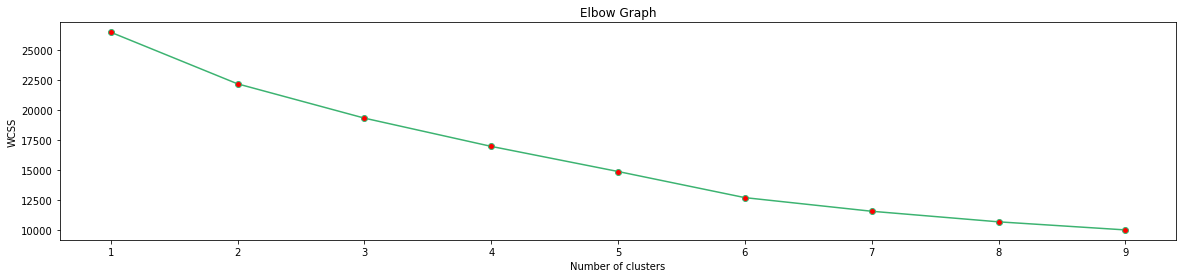

,0,1,2,3,4,5,6,7,8
WCSS,26460.0,22166.491697,19315.058164,16964.937954,14876.253123,12703.154779,11569.33281,10690.537024,10017.816296


In [27]:
#Scree Plot for k values
wcss = []  
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 50)
    kmeans.fit(cluster_norm)
    wcss.append(kmeans.inertia_)

fig = plt.figure(figsize = (20 ,4))   
plt.plot(range(1, 10), wcss, color = "mediumseagreen", marker = "o", markerfacecolor = "r")
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
pd.DataFrame(wcss, columns = ["WCSS"]).T #wcss(Within Cluster Sum of Squares) values for each no. of cluster

In [28]:
#Applying DBSCAN 
dbscan = DBSCAN(eps = 3, min_samples = 30)
dbscan.fit(cluster_norm)

#Noisy samples label -1.
pd.DataFrame(dbscan.labels_).value_counts()

 0    1856
 1     234
-1     115
dtype: int64

In [29]:
#Dropping from the original data
drop_row = np.where(dbscan.labels_ == -1)[0]
cluster_new = cluster.drop(drop_row)
cluster_new.reset_index(drop = True, inplace = True)

In [30]:
#Droping Outliers -1 from the data
cluster_norm = cluster_norm[dbscan.labels_ != -1]

Silhouette Score for k = 2: 0.2269
Silhouette Score for k = 3: 0.2172
Silhouette Score for k = 4: 0.2644
Silhouette Score for k = 5: 0.2694
Silhouette Score for k = 6: 0.3057
Silhouette Score for k = 7: 0.2828
Silhouette Score for k = 8: 0.2833
Silhouette Score for k = 9: 0.2815
Silhouette Score for k = 10: 0.2779


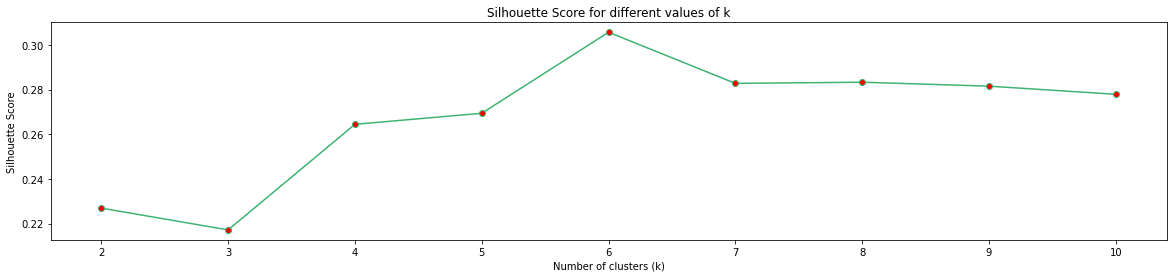

In [31]:
#Silhouette Scores for optimal k after dropping DBSCAN Outliers
silhouette_scores = [silhouette_score(cluster_norm, KMeans(n_clusters = k, random_state = 50).fit_predict(cluster_norm)) 
                     for k in range(2, 11)]

for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k = {k}: {score:.4f}")

fig = plt.figure(figsize = (20 ,4)) 
plt.plot(range(2, 11), silhouette_scores, color = "mediumseagreen", marker = "o", markerfacecolor = "r")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different values of k")
plt.show();

In [32]:
#Applying DBSCAN 
dbscan = DBSCAN(eps = 3, min_samples = 40)
dbscan.fit(cluster_norm)

#Noisy samples label -1.
pd.DataFrame(dbscan.labels_).value_counts()

 0    1838
 1     233
-1      19
dtype: int64

In [33]:
#Dropping from the original data
drop_row = np.where(dbscan.labels_ == -1)[0]
cluster_new = cluster_new.drop(drop_row)
cluster_new.reset_index(drop = True, inplace = True)

In [34]:
#Droping Outliers -1 from the data
cluster_norm = cluster_norm[dbscan.labels_ != -1]

In [35]:
#Dropping column Marital_Status_Widow as no entry
print(cluster_new.Marital_Status_Widow.value_counts())
cluster_new = cluster_new.drop(["Marital_Status_Widow"], axis = 1)

0    2071
Name: Marital_Status_Widow, dtype: int64


Silhouette Score for k = 2: 0.2313
Silhouette Score for k = 3: 0.2190
Silhouette Score for k = 4: 0.2667
Silhouette Score for k = 5: 0.2651
Silhouette Score for k = 6: 0.2996
Silhouette Score for k = 7: 0.2868
Silhouette Score for k = 8: 0.2829
Silhouette Score for k = 9: 0.2824
Silhouette Score for k = 10: 0.2841


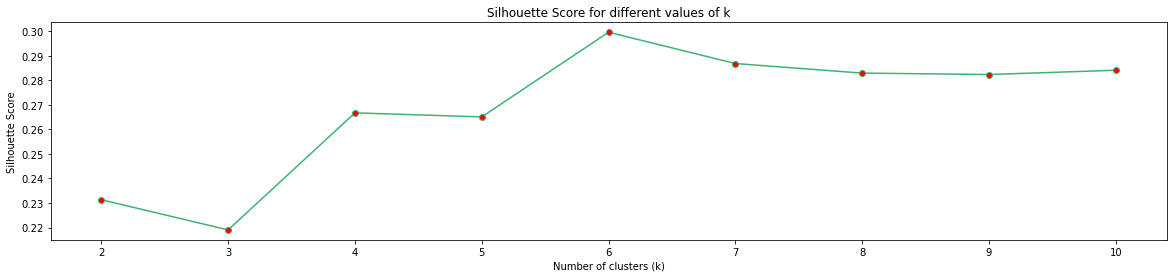

In [36]:
#Silhouette Scores for optimal k after dropping DBSCAN Outliers

silhouette_scores = [silhouette_score(cluster_norm, KMeans(n_clusters = k, random_state = 50).fit_predict(cluster_norm)) 
                     for k in range(2, 11)]

for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score for k = {k}: {score:.4f}")

fig = plt.figure(figsize = (20 ,4)) 
plt.plot(range(2, 11), silhouette_scores, color = "mediumseagreen", marker = "o", markerfacecolor = "r")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for different values of k")
plt.show();

In [37]:
#WCSS for k values 
wcss = []  
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 50)
    kmeans.fit(cluster_norm)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame(wcss, columns = ["WCSS"]).T

,0,1,2,3,4,5,6,7,8
WCSS,21228.086505,17084.128758,14630.343177,12350.105938,10973.822918,9860.548831,9081.821554,8447.328376,8038.289698


***Considering k = 6 as it gives the highest Silhouette and considerable WCSS***

## *`Model Building`*

In [38]:
#Arranging the columns and copying it in a order
cols = ["Age", "Marital_Status_Single", "Marital_Status_Married", "Education_Basic", "Education_Intermediate", 
        "Education_Master", "Children", "Income", "Amount_Spent", "Total_AcceptedCmp", "Response"]
cluster_norm = scaler.fit_transform(cluster_new)
cluster_norm = pd.DataFrame(cluster_norm, columns = cols)

In [39]:
#Build Cluster algorithm as per k-value (6)
k_clusters = KMeans(6, random_state = 50)
k_clusters.fit(cluster_norm)

KMeans(n_clusters=6, random_state=50)

In [40]:
#Assign clusters to orginal dataset 
cluster_new["ClusterId"] = k_clusters.labels_

In [41]:
#Saving the Final CSV File
cluster_new.to_csv("Cluster.csv", index = False)

In [42]:
#Assign clusters to the data set by  adding it as new column to the standardise data
cluster_norm["ClusterId"] = k_clusters.labels_
cluster_norm.ClusterId.unique()
cluster_norm.head()

,Age,Marital_Status_Single,Marital_Status_Married,Education_Basic,Education_Intermediate,Education_Master,Children,Income,Amount_Spent,Total_AcceptedCmp,Response,ClusterId
0,1.051703,1.434951,-1.434951,-0.356045,0.984191,-0.782095,-1.299304,0.363434,1.774362,-0.439906,2.627657,1
1,1.310485,1.434951,-1.434951,-0.356045,0.984191,-0.782095,1.383506,-0.213760,-0.944375,-0.439906,-0.380567,1
2,0.361619,-0.696888,0.696888,-0.356045,0.984191,-0.782095,-1.299304,1.022894,0.336338,-0.439906,-0.380567,2
3,-1.277330,-0.696888,0.696888,-0.356045,0.984191,-0.782095,0.042101,-1.177771,-0.899918,-0.439906,-0.380567,2
4,-1.018549,-0.696888,0.696888,-0.356045,-1.016063,1.278616,0.042101,0.371019,-0.268966,-0.439906,-0.380567,0


In [43]:
#Mean values column wise for each cluster 
cluster_new.groupby("ClusterId").agg(["mean"]).reset_index().T

,,0,1,2,3,4,5
ClusterId,,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000
Age,mean,56.713080,52.873494,53.201987,48.554113,55.516949,54.371134
Marital_Status_Single,mean,0.000000,1.000000,0.000000,0.290043,1.000000,0.216495
Marital_Status_Married,mean,1.000000,0.000000,1.000000,0.709957,0.000000,0.783505
Education_Basic,mean,0.000000,0.000000,0.000000,1.000000,0.000000,0.010309
Education_Intermediate,mean,0.000000,1.000000,1.000000,0.000000,0.000000,0.597938
Education_Master,mean,1.000000,0.000000,0.000000,0.000000,1.000000,0.391753
Children,mean,1.118143,0.930723,1.096026,0.896104,1.050847,0.257732
Income,mean,51091.729958,49184.737952,47005.690397,39578.943723,49834.572034,78259.010309
Amount_Spent,mean,508.253165,529.798193,450.908940,348.372294,537.898305,1562.664948


,ClusterId
2,604
0,474
1,332
4,236
3,231
5,194


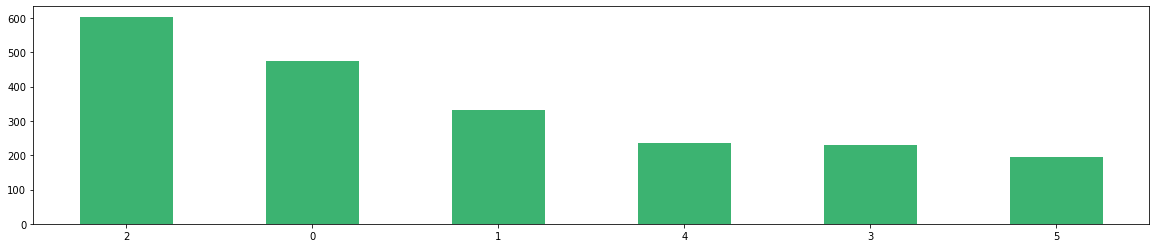

In [44]:
#No. of records in each cluster
fig = plt.figure(figsize=(20,4))
cluster_new["ClusterId"].value_counts().plot(kind = "bar", rot = 0, color = "mediumseagreen")

pd.DataFrame(cluster_new["ClusterId"].value_counts())

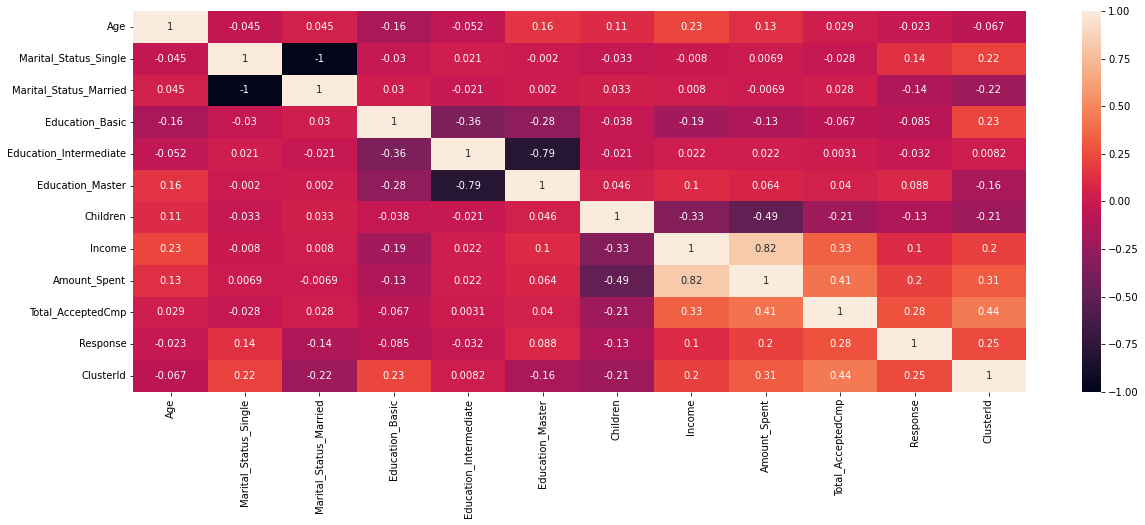

In [45]:
#Correlation Matrix
fig, ax = plt.subplots(figsize = (20, 7))
sns.heatmap(cluster_new.corr(), vmin = -1, vmax = 1, annot = True, square = False);

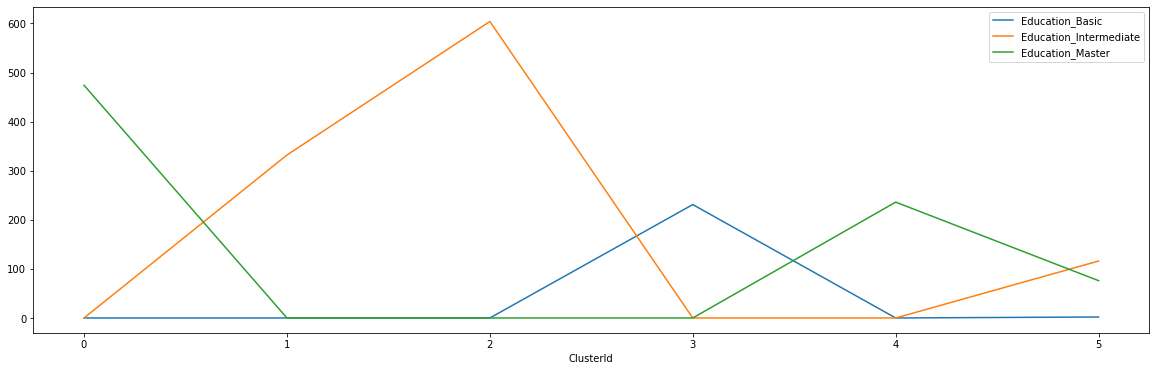

In [46]:
#Plot for Marital Status having Kids & Teens Home count
fig, ax = plt.subplots(figsize = (20, 6))
cluster_new.groupby("ClusterId")[["Education_Basic", "Education_Intermediate", "Education_Master"]].sum().plot(kind = "line", ax = ax);

## `Saving the Model`

In [47]:
dump(k_clusters, open("Cluster.sav", "wb"))
loaded_model = load(open("Cluster.sav", "rb"))

In [48]:
new_value = pd.DataFrame([[26, 0, 1, 0, 0, 1, 0, 15000, 500, 3, 1],
                          [60, 1, 0, 0, 0, 1, 2, 50000, 1000, 0, 0]])
new_value_std = scaler.transform(new_value)
prediction = loaded_model.predict(new_value_std)
pd.DataFrame(prediction)

,0
0,5
1,4
